# Gower distance for ordinal categorical variables

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [19]:
list(itertools.product([1, 2, 3, 4], repeat=3))

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3),
 (3, 3, 4),
 (3, 4, 1),
 (3, 4, 2),
 (3, 4, 3),
 (3, 4, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 3, 1),
 (4, 3, 2),
 (4, 3, 3),
 (4, 3, 4),
 (4, 4, 1),
 (4, 4, 2),
 (4, 4, 3),
 (4, 4, 4)]

## First approach

$$M_{ij} = \dfrac{\sum_{k = 1}^n w_{ijk}h_{ik} - w_{ijk}^2}{\sum_{k = 1}^N
			w_{ijk}}$$

In [44]:
def weight(categories, max_categories_ranks = [4, 4, 4, 4]):
    return list(map(lambda x: x[0]/x[1], zip(categories, max_categories_ranks)))

companies_weights = list(map(
    lambda x: { "company": x, "weights": weight(x), "candidates_merits": [] },
    variables
))

In [45]:
merits = []
for company in companies_weights:
    for candidate in companies_weights:
        candidate_weights = candidate['weights']
        numerator = 0
        for company_weight, candidate_weight in zip(company['weights'], candidate['weights']):
            numerator += (company_weight*candidate_weight) - (company_weight**2)
        company["candidates_merits"].append(numerator / sum(company['weights']))

## Second approach

$$M_{ij} = \dfrac{\sum_{k = 1}^n log_{(r_{k, max}-r_{jk}+2)} \frac{r_{ik}}{r_{jk}}}{n}$$

In [11]:
companies_weights = list(map(
    lambda x: { "company": x, "weights": x, "candidates_merits": [] },
    variables
))

NameError: name 'variables' is not defined

In [31]:
def merit_2(candidate=(), company=(), max_rs=()):
    result = 0
    for can, com, max_r in zip(candidate, company, max_rs):
        result += log((can)/com, max_r-com+2)
    return result / len(company)

In [32]:
for company in companies_weights:
    for candidate in companies_weights:
        numerator = merit_2(candidate['weights'], company['weights'], (4, 4, 4, 4))
        company["candidates_merits"].append(numerator)

In [44]:
merit_4([8], [1], [8])

0.946394630357186

## Third approach

In [17]:
a_p = lambda x: (3*x)**0.5
a_n = lambda x: (3*x+9)**0.5 -3
m_p = lambda x: a_p(x)/3
m_n = lambda x: a_n(x)/3

In [18]:
def merit_graph(candidate=(), company=()):
    numerator = 0
    for can, com in zip(candidate, company):
        diff = can - com
        if diff < 0:
            if com == 0:
                numerator += a_n(diff) * a_p(1/50)
            else:
                numerator += a_n(diff) * a_p(com)
        else:
            if com == 0:
                numerator += a_p(diff) * a_p(1/50)
            else:
                numerator += a_p(diff) * a_p(com)
    
    denominator = 0
    for com in company:
        if com == 0:
            denominator += a_p(1/50)
        else:
            denominator += a_p(com)
                      
    if numerator/denominator >= 0:
        return m_p(numerator/denominator)
    return m_n(numerator/denominator)

In [19]:
c

In [6]:
merit_graph(candidate=(0,0,0), company=(3, 3, 3))

-1.0

In [20]:
l = list(map(lambda c: c['candidates_merits'], companies_weights))
flat_list = [item for sublist in l for item in sublist]
a = len(list(filter(lambda x: x>=0, flat_list)))
b = len(flat_list)
a - b

len(list(filter(lambda x: x>1 or x<-1, flat_list)))


0

## [only positive] Third approach

In [22]:
a = lambda x: ((3*x)**0.5)/3

In [25]:
variables = list(itertools.product([0.001, 1, 2, 3], repeat=3))
companies_weights = list(map(
    lambda x: { "company": x, "weights": x, "candidates_merits": [] },
    variables
))
for company in companies_weights:
    for candidate in companies_weights:
        numerator = merit_3_p(candidate['weights'], company['weights'])
        company["candidates_merits"].append(numerator)

In [24]:
def merit_3_p(candidate=(), company=()):
    result = 0
    for can, com in zip(candidate, company):
        result += (a(can) - a(com))*a(com)
    return result / sum([a(com) for com in company])

## Fourth Approach

In [44]:
m = lambda x: 3**(x-3)

In [45]:
def merit_4(candidate=(), company=()):
    result = 0
    for can, com in zip(candidate, company):
        result += (m(can) - m(com))*m(com)
    return result / sum([m(com) for com in company])

In [46]:
variables = list(itertools.product([0, 1, 2, 3], repeat=3))
companies_weights = list(map(
    lambda x: { "company": x, "weights": x, "candidates_merits": [] },
    variables
))
for company in companies_weights:
    for candidate in companies_weights:
        numerator = merit_4(candidate['weights'], company['weights'])
        company["candidates_merits"].append(numerator)

### Colorful merits

In [12]:
merits = np.array(list(map(lambda x: x["candidates_merits"], companies_weights)))

### Binary merits

In [47]:
merits = np.array(list(map(
    lambda x: list(map(lambda y: 1 if y >= 0 else 0, x["candidates_merits"])),
    companies_weights
)))

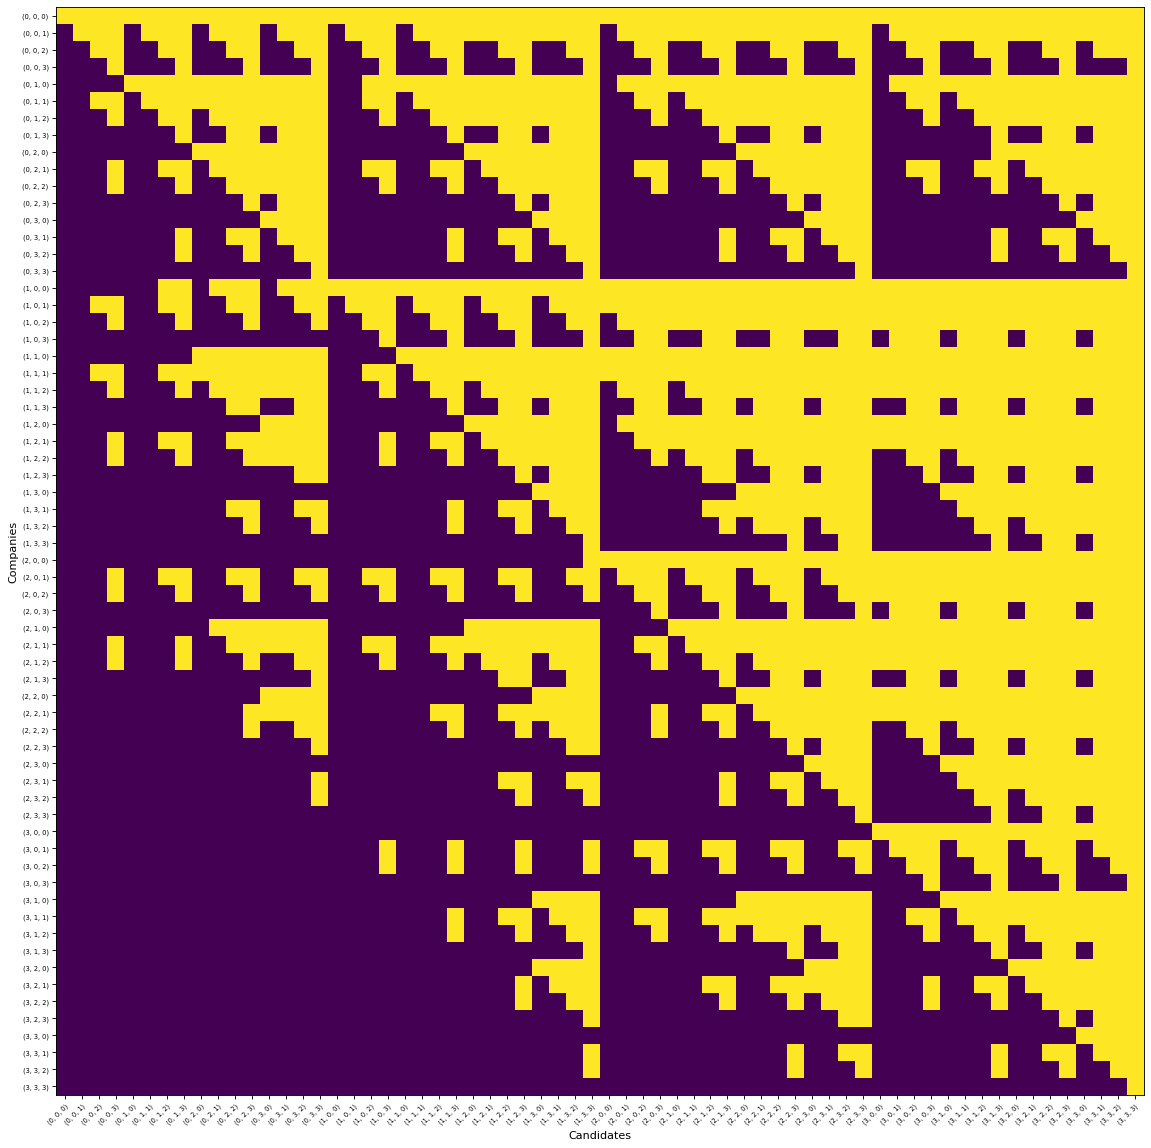

In [43]:
companies = candidates = variables

fig, ax = plt.subplots(figsize=(24, 18), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidates')
ax.set_ylabel('Companies')

ax.set_xticks(np.arange(len(candidates)))
ax.set_yticks(np.arange(len(companies)))

ax.set_xticklabels(candidates, fontsize=6)
ax.set_yticklabels(companies, fontsize=6)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Running the commented code causes an error when the svg is opened
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        ax.annotate(merits_colorful[i, j], (j, i), fontsize=0.5)

plt.savefig('result-binary-4.svg', format='svg', dpi=1200)

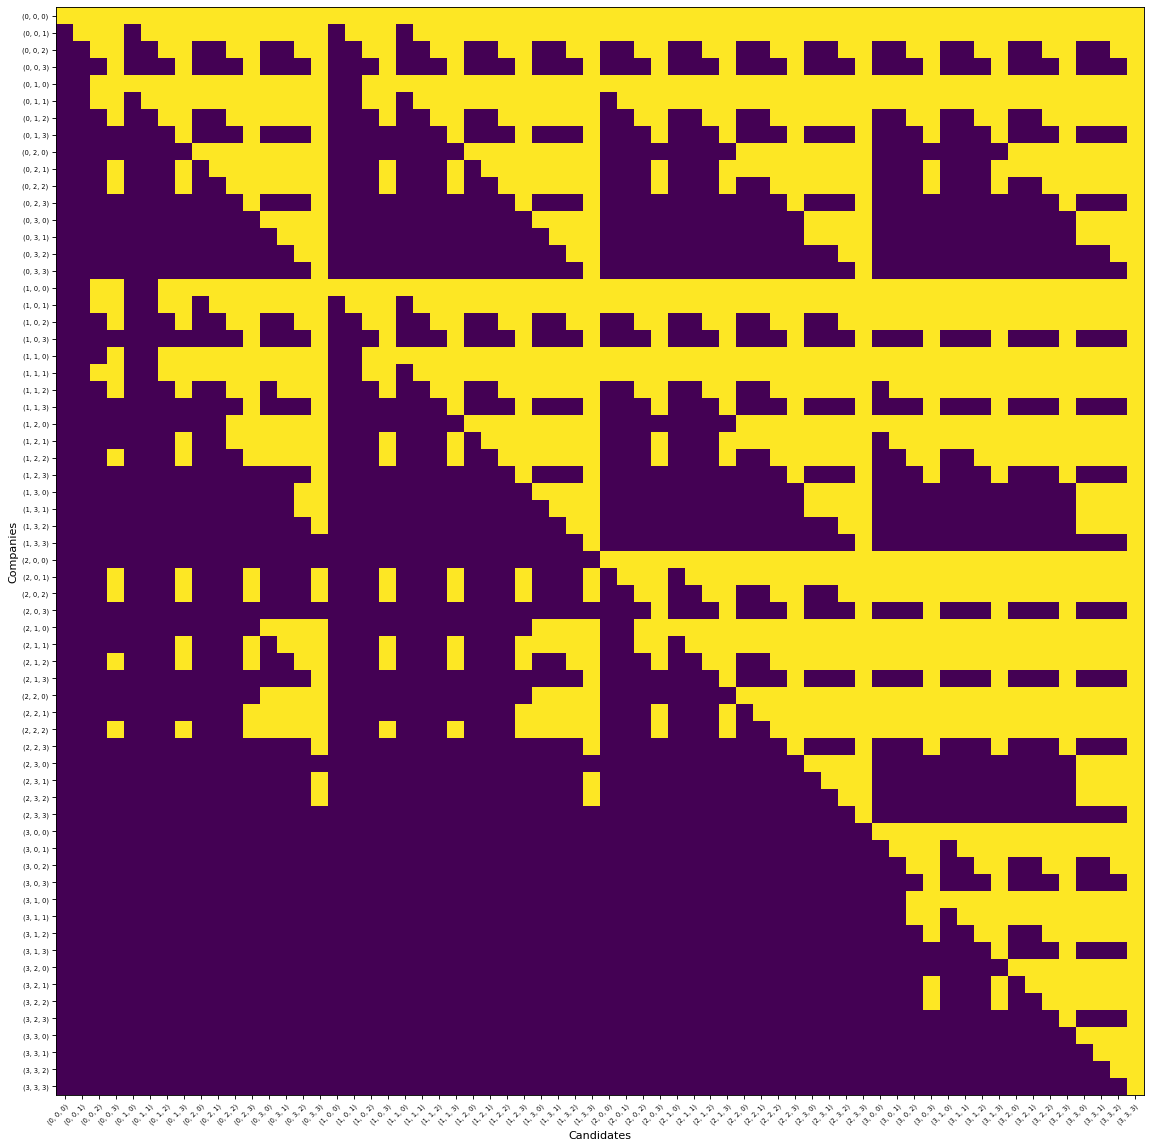

In [48]:
companies = candidates = variables

fig, ax = plt.subplots(figsize=(24, 18), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidates')
ax.set_ylabel('Companies')

ax.set_xticks(np.arange(len(candidates)))
ax.set_yticks(np.arange(len(companies)))

ax.set_xticklabels(candidates, fontsize=6)
ax.set_yticklabels(companies, fontsize=6)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Running the commented code causes an error when the svg is opened
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        ax.annotate(merits_colorful[i, j], (j, i), fontsize=0.5)

plt.savefig('result-binary-4.svg', format='svg', dpi=1200)